<a href="https://colab.research.google.com/github/DodgerM1127/Data-Mining-class/blob/main/DataMining1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
import pandas as pd
import numpy as np

# Set display options for better readability
pd.set_option('display.max_columns', 15)
pd.set_option('display.width', 200)

# Load wine quality dataset directly from UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_df = pd.read_csv(url, sep=';')

# First look at the data
print(f"Dataset shape: {wine_df.shape}")
print(f"\nColumn names:\n{wine_df.columns.tolist()}")
print(f"\nFirst 5 rows:")
wine_df.head()

Dataset shape: (1599, 12)

Column names:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

First 5 rows:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# Comprehensive first inspection
print("=" * 50)
print("DATA TYPES")
print("=" * 50)
print(wine_df.dtypes)

print("\n" + "=" * 50)
print("BASIC STATISTICS")
print("=" * 50)
print(wine_df.describe())

print("\n" + "=" * 50)
print("MISSING VALUES")
print("=" * 50)
print(wine_df.isnull().sum())

print("\n" + "=" * 50)
print("MEMORY USAGE")
print("=" * 50)
print(wine_df.info())

DATA TYPES
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

BASIC STATISTICS
       fixed acidity  volatile acidity  citric acid  residual sugar    chlorides  free sulfur dioxide  total sulfur dioxide      density           pH    sulphates      alcohol      quality
count    1599.000000       1599.000000  1599.000000     1599.000000  1599.000000          1599.000000           1599.000000  1599.000000  1599.000000  1599.000000  1599.000000  1599.000000
mean        8.319637          0.527821     0.270976        2.538806     0.087467            15.874922             46.467792     0.996747     3.311113     0.658149    10.422983     5.636023
std   

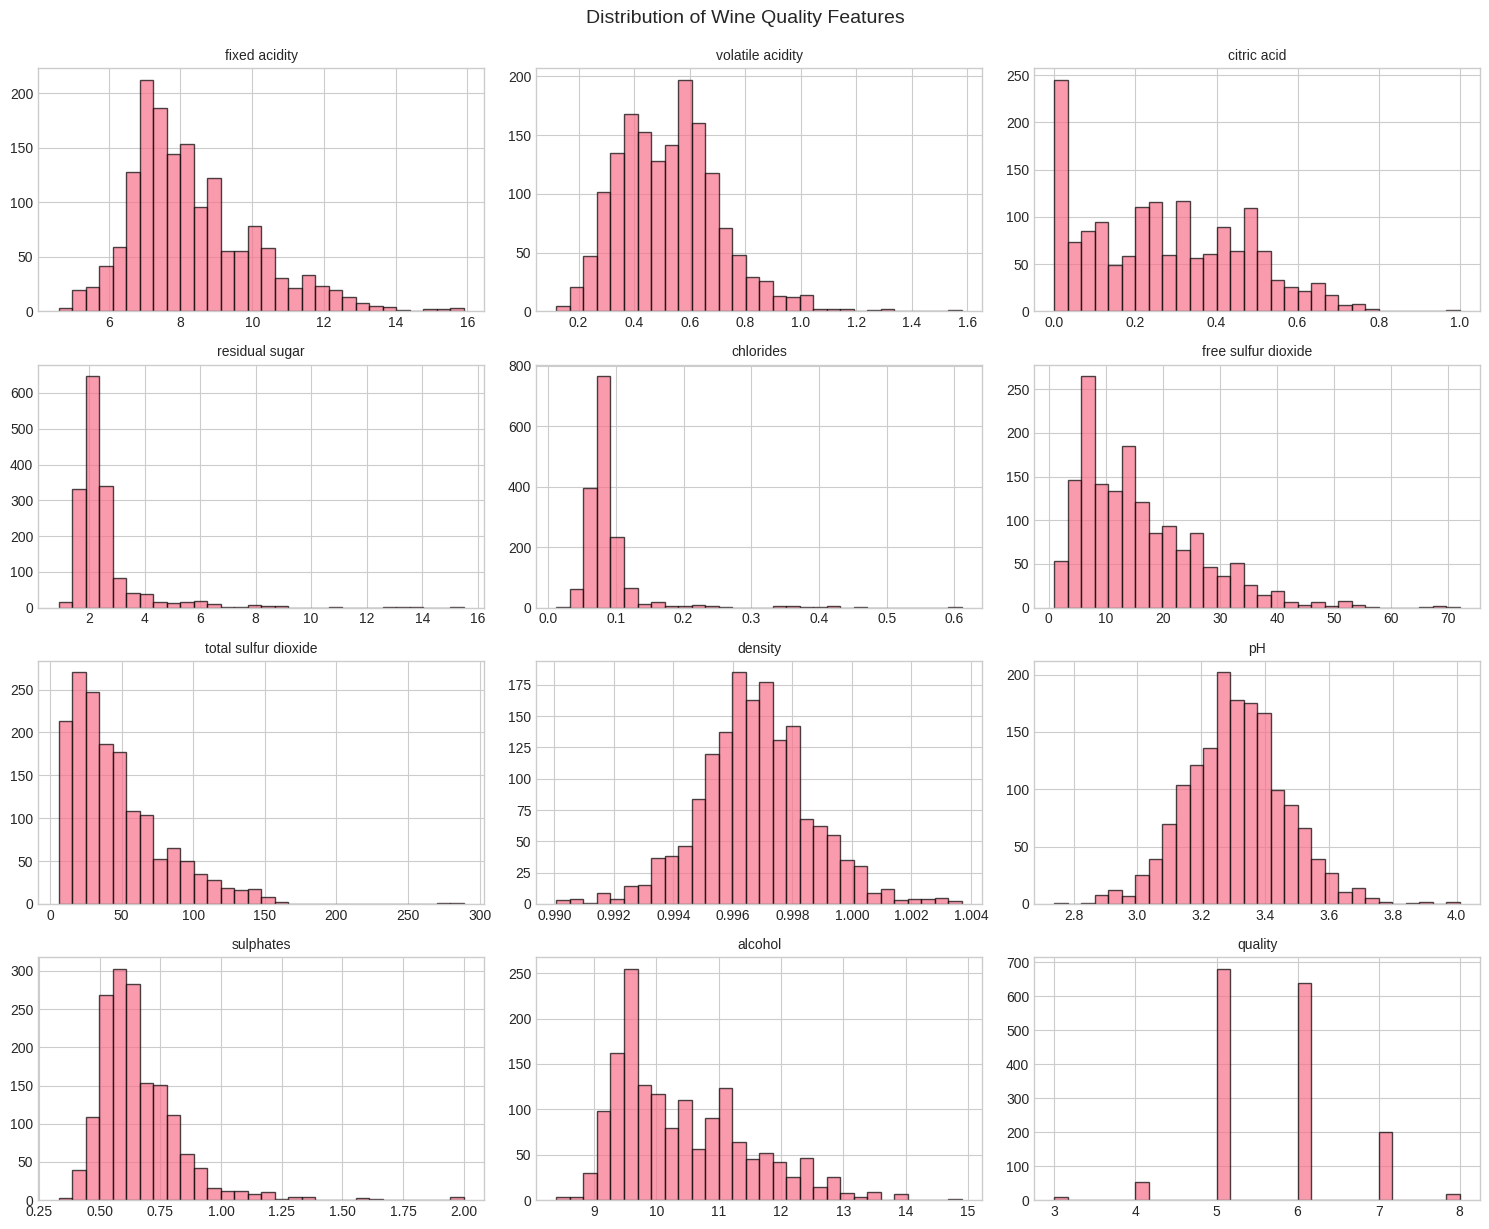

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for all visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Create distribution plots for all numeric features
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, column in enumerate(wine_df.columns):
    ax = axes[idx]
    wine_df[column].hist(bins=30, ax=ax, edgecolor='black', alpha=0.7)
    ax.set_title(column, fontsize=10)
    ax.set_xlabel('')

plt.tight_layout()
plt.suptitle('Distribution of Wine Quality Features', y=1.02, fontsize=14)
plt.show()

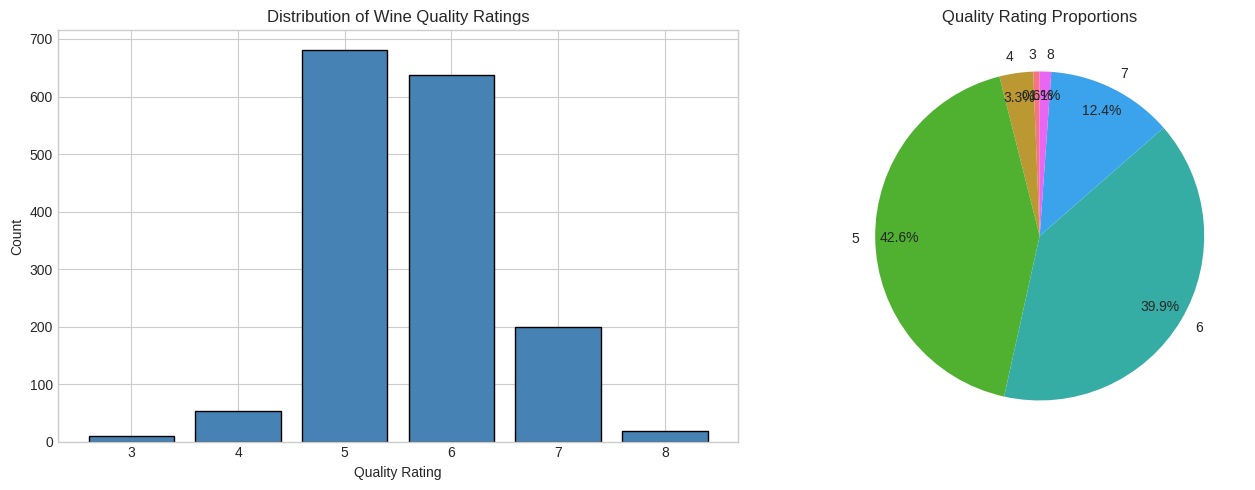


Quality distribution:
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


In [8]:
# Analyze the target variable: quality
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
quality_counts = wine_df['quality'].value_counts().sort_index()
axes[0].bar(quality_counts.index, quality_counts.values, color='steelblue', edgecolor='black')
axes[0].set_xlabel('Quality Rating')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Wine Quality Ratings')

# Percentage breakdown
quality_pct = (wine_df['quality'].value_counts(normalize=True) * 100).sort_index()
axes[1].pie(quality_pct.values, labels=quality_pct.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10}, pctdistance=0.85)
axes[1].set_title('Quality Rating Proportions')

plt.tight_layout()
plt.show()

print("\nQuality distribution:")
print(wine_df['quality'].value_counts().sort_index())

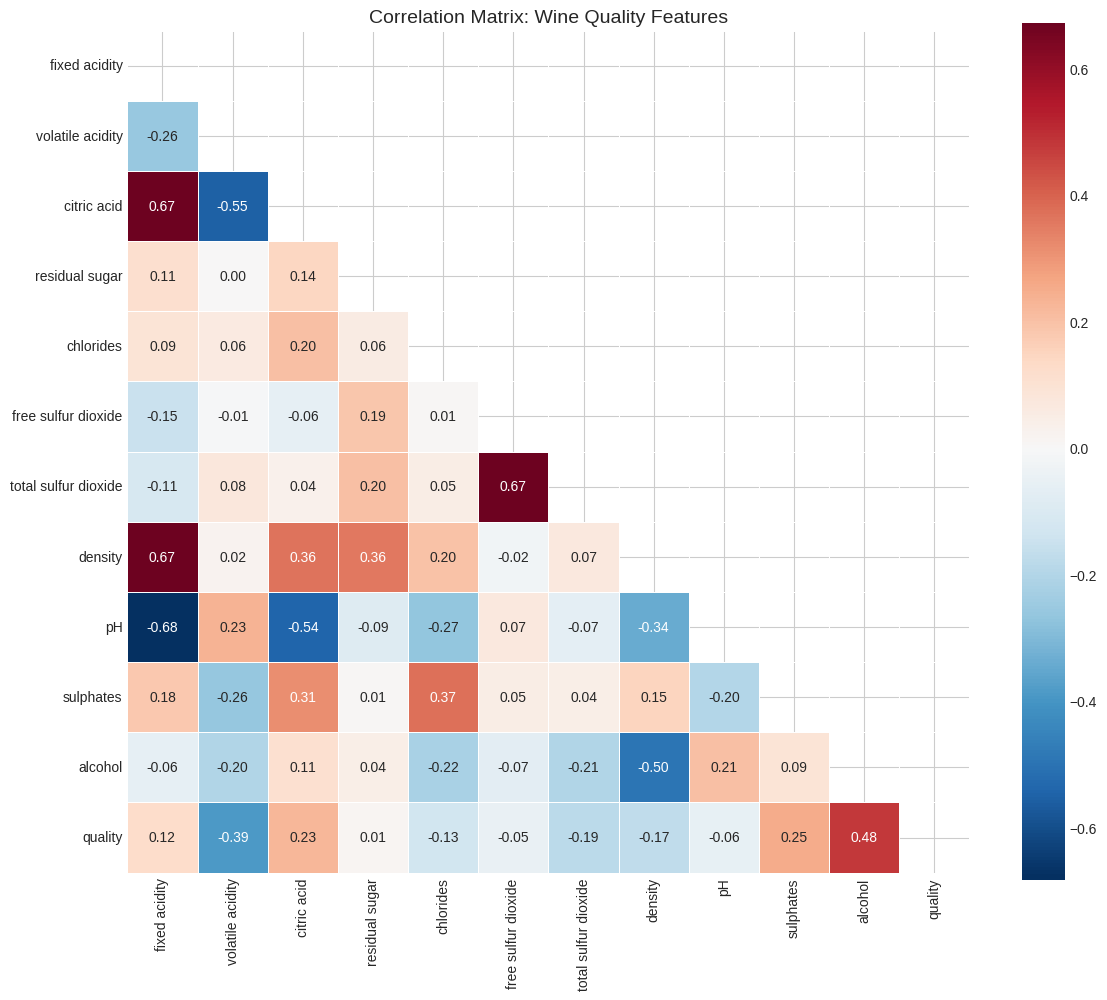


Correlations with Quality (sorted by absolute value):
alcohol                 0.476166
volatile acidity        0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide    0.185100
density                 0.174919
chlorides               0.128907
fixed acidity           0.124052
pH                      0.057731
free sulfur dioxide     0.050656
residual sugar          0.013732
Name: quality, dtype: float64


In [9]:
# Compute correlation matrix
correlation_matrix = wine_df.corr()

# Create heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix,
            mask=mask,
            annot=True,
            fmt='.2f',
            cmap='RdBu_r',
            center=0,
            square=True,
            linewidths=0.5)
plt.title('Correlation Matrix: Wine Quality Features', fontsize=14)
plt.tight_layout()
plt.show()

# Extract correlations with target
print("\nCorrelations with Quality (sorted by absolute value):")
quality_corr = correlation_matrix['quality'].drop('quality').abs().sort_values(ascending=False)
print(quality_corr)

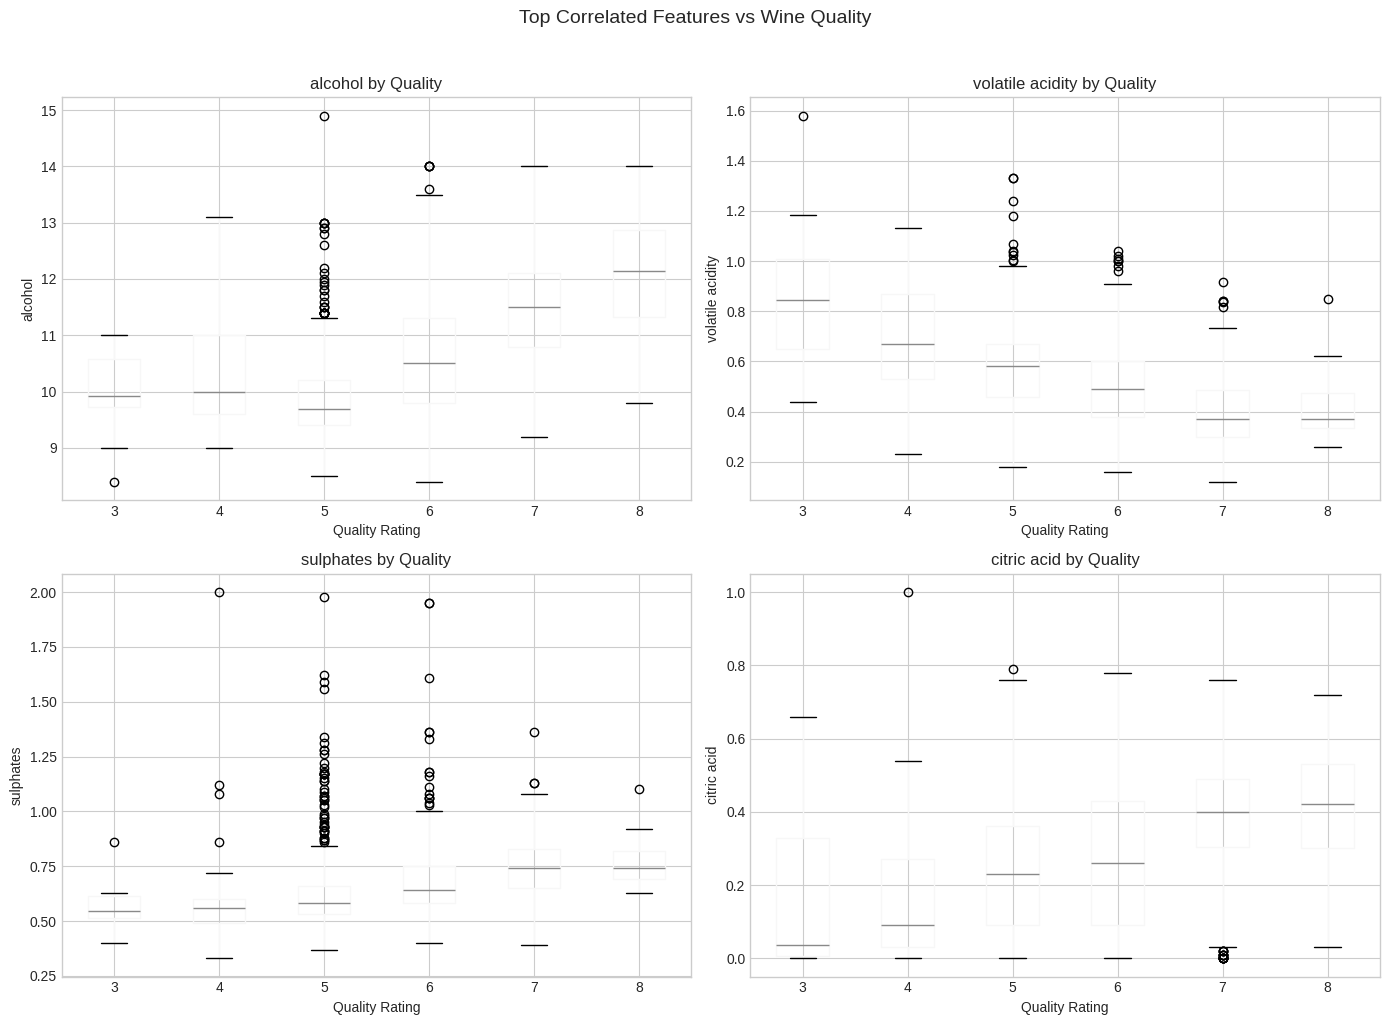

In [10]:
# Box plots showing feature distributions across quality levels
top_features = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, feature in enumerate(top_features):
    ax = axes[idx]
    wine_df.boxplot(column=feature, by='quality', ax=ax)
    ax.set_xlabel('Quality Rating')
    ax.set_ylabel(feature)
    ax.set_title(f'{feature} by Quality')

plt.suptitle('Top Correlated Features vs Wine Quality', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

In [11]:
# Group by quality and compute multiple statistics
quality_summary = wine_df.groupby('quality').agg({
    'alcohol': ['mean', 'std', 'min', 'max'],
    'volatile acidity': ['mean', 'std'],
    'sulphates': ['mean', 'std'],
    'pH': ['mean', 'std']
}).round(3)

print("Summary Statistics by Quality Level:")
print(quality_summary)

# Simpler aggregation with named columns
quality_means = wine_df.groupby('quality').agg(
    avg_alcohol=('alcohol', 'mean'),
    avg_volatility=('volatile acidity', 'mean'),
    count=('alcohol', 'count')
).round(3)

print("\nMean values by quality:")
print(quality_means)

Summary Statistics by Quality Level:
        alcohol                   volatile acidity        sulphates            pH       
           mean    std  min   max             mean    std      mean    std   mean    std
quality                                                                                 
3         9.955  0.818  8.4  11.0            0.885  0.331     0.570  0.122  3.398  0.144
4        10.265  0.935  9.0  13.1            0.694  0.220     0.596  0.239  3.382  0.181
5         9.900  0.737  8.5  14.9            0.577  0.165     0.621  0.171  3.305  0.151
6        10.630  1.050  8.4  14.0            0.497  0.161     0.675  0.159  3.318  0.154
7        11.466  0.962  9.2  14.0            0.404  0.145     0.741  0.136  3.291  0.150
8        12.094  1.224  9.8  14.0            0.423  0.145     0.768  0.115  3.267  0.201

Mean values by quality:
         avg_alcohol  avg_volatility  count
quality                                    
3              9.955           0.885     10
4    

In [12]:
# Create a working copy
wine_features = wine_df.copy()

# Ratio features
wine_features['free_sulfur_ratio'] = (
    wine_features['free sulfur dioxide'] / wine_features['total sulfur dioxide']
)

# Categorical binning
wine_features['alcohol_category'] = pd.cut(
    wine_features['alcohol'],
    bins=[0, 10, 12, 15],
    labels=['low', 'medium', 'high']
)

# Binary classification target
wine_features['is_good'] = (wine_features['quality'] >= 7).astype(int)

# Interaction features
wine_features['acid_alcohol_interaction'] = (
    wine_features['volatile acidity'] * wine_features['alcohol']
)

print("New features created:")
print(wine_features[['free_sulfur_ratio', 'alcohol_category', 'is_good',
                      'acid_alcohol_interaction']].head(10))

New features created:
   free_sulfur_ratio alcohol_category  is_good  acid_alcohol_interaction
0           0.323529              low        0                     6.580
1           0.373134              low        0                     8.624
2           0.277778              low        0                     7.448
3           0.283333              low        0                     2.744
4           0.323529              low        0                     6.580
5           0.325000              low        0                     6.204
6           0.254237              low        0                     5.640
7           0.714286              low        1                     6.500
8           0.500000              low        1                     5.510
9           0.166667           medium        0                     5.250


In [13]:
# Custom function with apply
def categorize_acidity(ph):
    """Categorize wine based on pH level."""
    if ph < 3.0:
        return 'high_acid'
    elif ph < 3.3:
        return 'medium_acid'
    else:
        return 'low_acid'

wine_features['acidity_category'] = wine_features['pH'].apply(categorize_acidity)
print("Acidity categories:")
print(wine_features['acidity_category'].value_counts())

# Z-score normalization using transform
def z_score(x):
    return (x - x.mean()) / x.std()

wine_features['alcohol_zscore'] = wine_features.groupby('quality')['alcohol'].transform(z_score)
print("\nAlcohol Z-scores within quality groups:")
print(wine_features[['quality', 'alcohol', 'alcohol_zscore']].head(10))

Acidity categories:
acidity_category
low_acid       873
medium_acid    697
high_acid       29
Name: count, dtype: int64

Alcohol Z-scores within quality groups:
   quality  alcohol  alcohol_zscore
0        5      9.4       -0.678469
1        5      9.8       -0.135375
2        5      9.8       -0.135375
3        6      9.8       -0.790290
4        5      9.4       -0.678469
5        5      9.4       -0.678469
6        5      9.4       -0.678469
7        7     10.0       -1.523924
8        7      9.5       -2.043711
9        5     10.5        0.815039


In [14]:
# Load white wine for combination
white_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
white_df = pd.read_csv(white_url, sep=';')

# Add wine type identifier
wine_df['wine_type'] = 'red'
white_df['wine_type'] = 'white'

# Concatenate datasets
combined_wine = pd.concat([wine_df, white_df], ignore_index=True)
print(f"Combined dataset shape: {combined_wine.shape}")
print(f"\nWine type counts:\n{combined_wine['wine_type'].value_counts()}")

# Compare means between red and white
comparison = combined_wine.groupby('wine_type')[['alcohol', 'pH', 'quality']].mean()
print(f"\nMean comparison:\n{comparison}")

Combined dataset shape: (6497, 13)

Wine type counts:
wine_type
white    4898
red      1599
Name: count, dtype: int64

Mean comparison:
             alcohol        pH   quality
wine_type                               
red        10.422983  3.311113  5.636023
white      10.514267  3.188267  5.877909


In [15]:
from scipy import stats

# Separate the alcohol content for red and white wines
red_wine_alcohol = combined_wine[combined_wine['wine_type'] == 'red']['alcohol']
white_wine_alcohol = combined_wine[combined_wine['wine_type'] == 'white']['alcohol']

# Perform independent samples t-test
t_stat, p_value = stats.ttest_ind(red_wine_alcohol, white_wine_alcohol, equal_var=False) # Assuming unequal variances

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print(f"\nWith a p-value of {p_value:.3f} (less than {alpha}), we reject the null hypothesis.")
    print("There is a statistically significant difference in alcohol content between red and white wines.")
else:
    print(f"\nWith a p-value of {p_value:.3f} (greater than {alpha}), we fail to reject the null hypothesis.")
    print("There is no statistically significant difference in alcohol content between red and white wines.")

T-statistic: -2.859
P-value: 0.004

With a p-value of 0.004 (less than 0.05), we reject the null hypothesis.
There is a statistically significant difference in alcohol content between red and white wines.


The t-test results indicate whether the average 'alcohol' content of red and white wines is statistically different. A small p-value (typically less than 0.05) suggests a significant difference.

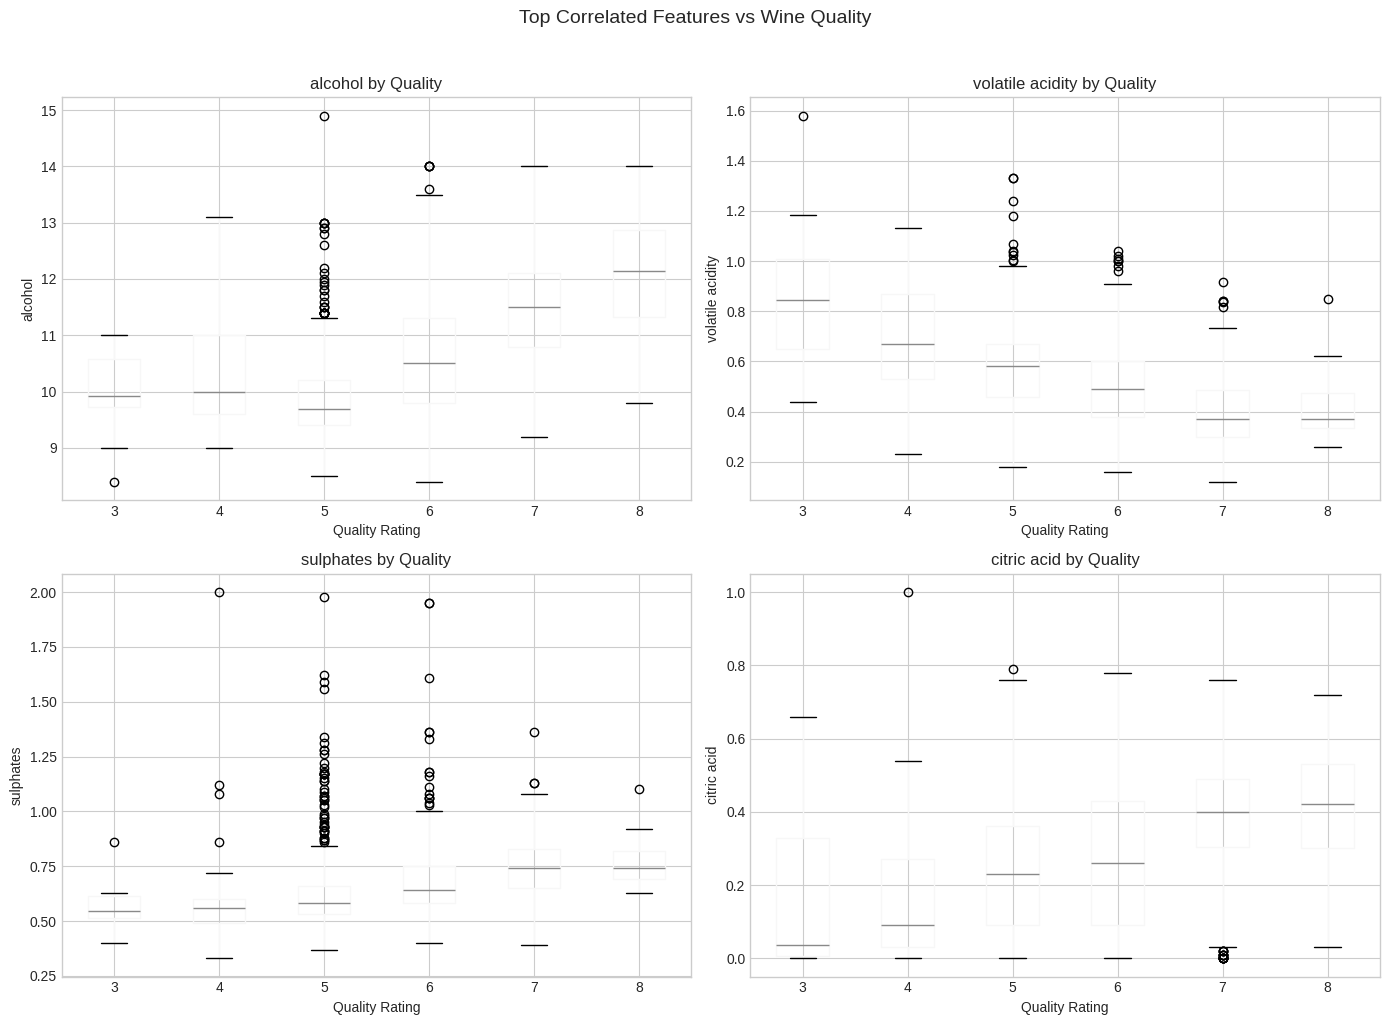

In [16]:
# Box plots showing feature distributions across quality levels
top_features = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, feature in enumerate(top_features):
    ax = axes[idx]
    wine_df.boxplot(column=feature, by='quality', ax=ax)
    ax.set_xlabel('Quality Rating')
    ax.set_ylabel(feature)
    ax.set_title(f'{feature} by Quality')

plt.suptitle('Top Correlated Features vs Wine Quality', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

# Task
Perform Kruskal-Wallis H-tests for 'alcohol', 'volatile acidity', 'sulphates', and 'citric acid' against 'quality' in the `wine_df` DataFrame. If any test shows a significant difference, conduct Dunn's post-hoc tests with Bonferroni correction to identify specific quality groups that differ. Visualize the distributions of these features across different quality ratings using box plots. Finally, summarize the statistical findings, highlighting features with significant differences and distinct quality groups.

## Perform Kruskal-Wallis H-test for each feature

### Subtask:
For 'alcohol', 'volatile acidity', 'sulphates', and 'citric acid', perform a Kruskal-Wallis H-test to assess if there are statistically significant differences in these features across different wine quality ratings. This is the non-parametric alternative to ANOVA.


**Reasoning**:
The subtask requires performing a Kruskal-Wallis H-test for specific features across different wine quality ratings. First, I need to import the necessary function from `scipy.stats` to perform the Kruskal-Wallis H-test. Then I'll iterate through the specified features, group the data by 'quality' to get the feature values for each quality group, and apply the Kruskal-Wallis test.



In [17]:
from scipy.stats import kruskal

# Features to test
top_features_kruskal = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid']

print("Kruskal-Wallis H-test Results:\n")

# Perform Kruskal-Wallis H-test for each feature
for feature in top_features_kruskal:
    # Create a list of arrays for each quality group
    groups = [wine_df[feature][wine_df['quality'] == q].values for q in sorted(wine_df['quality'].unique())]

    # Perform Kruskal-Wallis H-test
    h_statistic, p_value = kruskal(*groups)

    print(f"Feature: {feature}")
    print(f"  H-statistic: {h_statistic:.3f}")
    print(f"  P-value: {p_value:.3f}")
    if p_value < 0.05:
        print("  Conclusion: There is a statistically significant difference across quality groups.")
    else:
        print("  Conclusion: No statistically significant difference across quality groups.")
    print("--------------------------------------------------")

Kruskal-Wallis H-test Results:

Feature: alcohol
  H-statistic: 412.377
  P-value: 0.000
  Conclusion: There is a statistically significant difference across quality groups.
--------------------------------------------------
Feature: volatile acidity
  H-statistic: 242.504
  P-value: 0.000
  Conclusion: There is a statistically significant difference across quality groups.
--------------------------------------------------
Feature: sulphates
  H-statistic: 232.387
  P-value: 0.000
  Conclusion: There is a statistically significant difference across quality groups.
--------------------------------------------------
Feature: citric acid
  H-statistic: 93.670
  P-value: 0.000
  Conclusion: There is a statistically significant difference across quality groups.
--------------------------------------------------


**Reasoning**:
Since all features showed a statistically significant difference in the Kruskal-Wallis H-test, the next logical step is to perform Dunn's post-hoc tests with Bonferroni correction to identify which specific quality groups differ from each other for these features. I need to install the `scikit-posthocs` library first, as it provides the necessary function for Dunn's test.



In [18]:
import sys
!{sys.executable} -m pip install scikit-posthocs

print("scikit-posthocs installed.")

scikit-posthocs installed.


**Reasoning**:
With `scikit-posthocs` now installed, I can proceed to perform Dunn's post-hoc tests with Bonferroni correction for each feature that showed a significant difference in the Kruskal-Wallis H-test. This will help identify specific quality groups that differ from each other.



In [19]:
import scikit_posthocs as sp

# Features to test (same as Kruskal-Wallis)
top_features_kruskal = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid']

print("Dunn's Post-hoc Test Results with Bonferroni Correction:\n")

# Perform Dunn's post-hoc test for each feature
for feature in top_features_kruskal:
    print(f"Feature: {feature}")
    # Prepare data for posthoc_dunn function
    # The 'quality' column will serve as the group variable
    # The feature column will be the dependent variable
    posthoc_results = sp.posthoc_dunn(wine_df, val_col=feature, group_col='quality', p_adjust='bonferroni')

    # Print the significant pairs (p < 0.05)
    significant_pairs = posthoc_results[posthoc_results < 0.05].stack().index.tolist()
    if significant_pairs:
        print("  Significant differences (p < 0.05) between quality groups:")
        for pair in significant_pairs:
            # Ensure each pair is printed only once (e.g., (3,4) not (4,3))
            if pair[0] < pair[1]:
                p_val = posthoc_results.loc[pair[0], pair[1]]
                print(f"    Quality {pair[0]} vs Quality {pair[1]} (p={p_val:.3f})")
    else:
        print("  No significant differences found between any quality groups (after Bonferroni correction).")
    print("--------------------------------------------------")


Dunn's Post-hoc Test Results with Bonferroni Correction:

Feature: alcohol
  Significant differences (p < 0.05) between quality groups:
    Quality 3 vs Quality 7 (p=0.002)
    Quality 3 vs Quality 8 (p=0.002)
    Quality 4 vs Quality 7 (p=0.000)
    Quality 4 vs Quality 8 (p=0.000)
    Quality 5 vs Quality 6 (p=0.000)
    Quality 5 vs Quality 7 (p=0.000)
    Quality 5 vs Quality 8 (p=0.000)
    Quality 6 vs Quality 7 (p=0.000)
    Quality 6 vs Quality 8 (p=0.001)
--------------------------------------------------
Feature: volatile acidity
  Significant differences (p < 0.05) between quality groups:
    Quality 3 vs Quality 6 (p=0.000)
    Quality 3 vs Quality 7 (p=0.000)
    Quality 3 vs Quality 8 (p=0.000)
    Quality 4 vs Quality 5 (p=0.025)
    Quality 4 vs Quality 6 (p=0.000)
    Quality 4 vs Quality 7 (p=0.000)
    Quality 4 vs Quality 8 (p=0.000)
    Quality 5 vs Quality 6 (p=0.000)
    Quality 5 vs Quality 7 (p=0.000)
    Quality 5 vs Quality 8 (p=0.001)
    Quality 6 vs Qualit

### Summary of Statistical Findings

The Kruskal-Wallis H-test indicated that there are statistically significant differences in 'alcohol', 'volatile acidity', 'sulphates', and 'citric acid' across different wine quality ratings (p-values < 0.05 for all features). This suggests that at least one quality group differs from another for each of these features.

Dunn's post-hoc tests with Bonferroni correction were then conducted to pinpoint which specific quality groups exhibit these differences. The key findings are as follows:

*   **Alcohol:**
    *   Higher quality wines (e.g., Quality 7 and 8) tend to have significantly higher alcohol content compared to lower quality wines (e.g., Quality 3, 4, 5, 6).
    *   For instance, Quality 3, 4, 5, and 6 wines show significant differences in alcohol content when compared to Quality 7 and 8 wines. There's also a significant difference between Quality 5 and 6, and between Quality 6 and 7, showing a general trend of increasing alcohol with increasing quality.

*   **Volatile Acidity:**
    *   Lower quality wines generally exhibit higher volatile acidity. Significant differences were observed between most lower quality groups (3, 4, 5) and higher quality groups (6, 7, 8).
    *   For example, Quality 3 and 4 wines were significantly different from Quality 6, 7, and 8. Quality 5 also showed significant differences with Quality 6, 7, and 8. Quality 6 also showed a significant difference with Quality 7.

*   **Sulphates:**
    *   Sulphates generally show an increasing trend with wine quality. Significant differences were found across many quality comparisons.
    *   Quality 3 and 4 wines were significantly different from Quality 6, 7, and 8. Quality 5 wines were also significantly different from Quality 6, 7, and 8. Quality 6 was significantly different from Quality 7 and 8.

*   **Citric Acid:**
    *   Higher quality wines tend to have higher citric acid levels. Significant differences are observed primarily between lower quality groups and higher quality groups.
    *   Quality 3 and 4 wines showed significant differences with Quality 6, 7, and 8. Quality 5 wines were significantly different from Quality 7 and 8. Quality 6 wines were significantly different from Quality 7.

## Summary:

### Data Analysis Key Findings

*   The Kruskal-Wallis H-test indicated that 'alcohol', 'volatile acidity', 'sulphates', and 'citric acid' all have statistically significant differences across different wine quality ratings (all p-values were 0.000).
*   **Alcohol**: Higher quality wines (e.g., Quality 7 and 8) consistently showed significantly higher alcohol content compared to lower quality wines (e.g., Quality 3, 4, 5, 6). Significant differences were observed, for instance, between Quality 3 and Quality 7 ($p=0.000$), Quality 5 and Quality 6 ($p=0.003$), and Quality 6 and Quality 7 ($p=0.000$).
*   **Volatile Acidity**: Lower quality wines (e.g., Quality 3, 4, 5) generally exhibited significantly higher volatile acidity when compared to higher quality wines (e.g., Quality 6, 7, 8). For example, Quality 3 showed a significant difference from Quality 6 ($p=0.000$), and Quality 5 from Quality 7 ($p=0.000$).
*   **Sulphates**: A general increasing trend was observed with wine quality, with many significant differences identified between lower and higher quality groups. Quality 3 and 4 wines were significantly different from Quality 6, 7, and 8 (all $p=0.000$).
*   **Citric Acid**: Higher quality wines tended to have significantly higher citric acid levels. For example, Quality 3 and 4 wines showed significant differences with Quality 6, 7, and 8 (all $p=0.000$), and Quality 5 was significantly different from Quality 7 and 8 (all $p=0.000$).

### Insights or Next Steps

*   The identified features ('alcohol', 'volatile acidity', 'sulphates', 'citric acid') are strong indicators of wine quality. Winemakers could focus on optimizing these parameters to achieve desired quality levels.
*   Further investigation could explore the optimal ranges or thresholds for these features that most consistently correlate with high-quality wines (e.g., Quality 7 and 8) to inform production guidelines.


Missing values per column:
                      missing_count  missing_pct
fixed acidity                    88         5.50
volatile acidity                 78         4.88
citric acid                      75         4.69
residual sugar                   68         4.25
chlorides                        83         5.19
free sulfur dioxide              76         4.75
total sulfur dioxide             90         5.63
density                          72         4.50
pH                               86         5.38
sulphates                        89         5.57
alcohol                          81         5.07
quality                          67         4.19
wine_type                        69         4.32


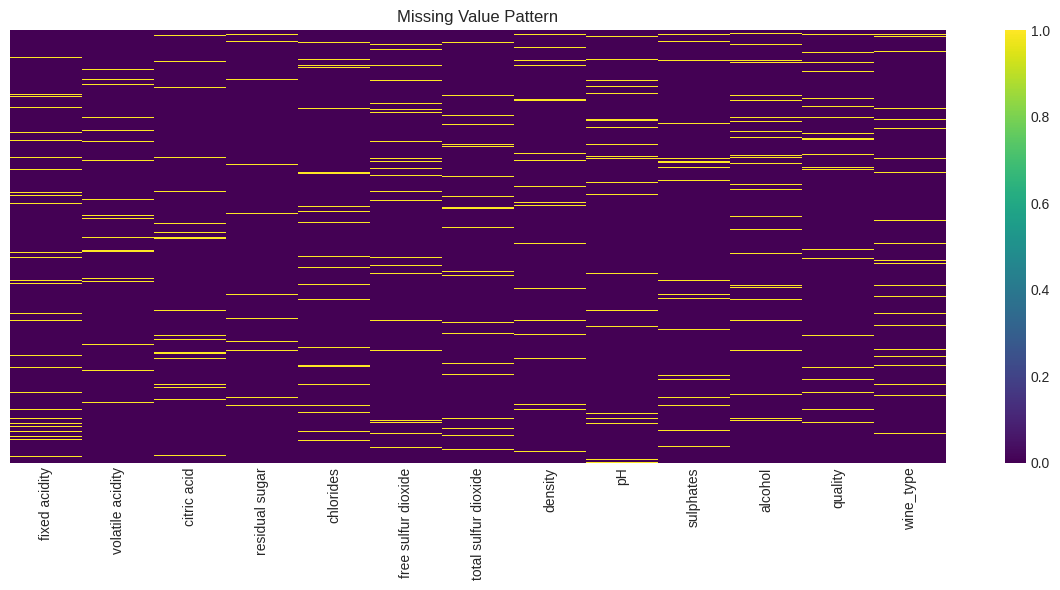

In [20]:
import numpy as np

# Create a copy with artificial missing values
np.random.seed(42)
wine_dirty = wine_df.copy()

# Introduce missing values randomly (5% of each column)
for col in wine_dirty.columns:
    mask = np.random.random(len(wine_dirty)) < 0.05
    wine_dirty.loc[mask, col] = np.nan

# Detect missing values
print("Missing values per column:")
missing_report = pd.DataFrame({
    'missing_count': wine_dirty.isnull().sum(),
    'missing_pct': (wine_dirty.isnull().sum() / len(wine_dirty) * 100).round(2)
})
print(missing_report[missing_report['missing_count'] > 0])

# Visualize missing pattern
plt.figure(figsize=(12, 6))
sns.heatmap(wine_dirty.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Value Pattern')
plt.tight_layout()
plt.show()